2.1.1 Data Format Converter

SAMPLE DATA:-

In [8]:
import pandas as pd
import json

# Sample CSV-like data
csv_data = {
    "name": ["Ram", "Shyam", "Hari"],
    "age": [25, 30, None],
    "city": ["Kathmandu", "Pokhara", "Biratnagar"]
}
df_csv = pd.DataFrame(csv_data)

print("CSV DataFrame:\n", df_csv)

CSV DataFrame:
     name   age        city
0    Ram  25.0   Kathmandu
1  Shyam  30.0     Pokhara
2   Hari   NaN  Biratnagar


1. CONVERSION OF DATA

In [10]:
# Convert to JSON
json_str = df_csv.to_json(orient="records", indent=4)
print("\nJSON format:\n", json_str)

# Convert back from JSON
data = json.loads(json_str)
df_json = pd.json_normalize(data)
print("\nDataFrame from JSON:\n", df_json)

# Convert to Excel-like (just show how it works)
df_csv.to_excel("sample.xlsx", index=False)  # creates file


JSON format:
 [
    {
        "name":"Ram",
        "age":25.0,
        "city":"Kathmandu"
    },
    {
        "name":"Shyam",
        "age":30.0,
        "city":"Pokhara"
    },
    {
        "name":"Hari",
        "age":null,
        "city":"Biratnagar"
    }
]

DataFrame from JSON:
     name   age        city
0    Ram  25.0   Kathmandu
1  Shyam  30.0     Pokhara
2   Hari   NaN  Biratnagar


2. HANDLING NESTED JSON

In [11]:
nested_json = {
    "id": 1,
    "name": "Ram",
    "address": {"city": "Kathmandu", "zip": "44600"}
}

df_nested = pd.json_normalize(nested_json)
print("\nFlattened Nested JSON:\n", df_nested)


Flattened Nested JSON:
    id name address.city address.zip
0   1  Ram    Kathmandu       44600


3. VALIDATING DATA TYPES AND DETECTING MISSING VALUES

In [12]:
print("\nData Types:\n", df_csv.dtypes)
print("\nMissing Values:\n", df_csv.isnull().sum())

# Convert 'age' safely
if "age" in df_csv.columns:
    df_csv["age"] = pd.to_numeric(df_csv["age"], errors="coerce")
print("\nAfter Conversion:\n", df_csv)


Data Types:
 name        str
age     float64
city        str
dtype: object

Missing Values:
 name    0
age     1
city    0
dtype: int64

After Conversion:
     name   age        city
0    Ram  25.0   Kathmandu
1  Shyam  30.0     Pokhara
2   Hari   NaN  Biratnagar


CLI FOR SELECTING INPUT AND OUTPUT FORMATS

In [16]:
import argparse

def main():
    parser = argparse.ArgumentParser(description="Data Format Converter")
    parser.add_argument("input_format", choices=["csv", "json", "excel", "txt"])
    parser.add_argument("output_format", choices=["csv", "json", "excel", "txt"])
    args = parser.parse_args()

    print(f"Simulating conversion from {args.input_format} to {args.output_format}...")

if __name__ == "__main__":
    main()

usage: ipykernel_launcher.py [-h] {csv,json,excel,txt} {csv,json,excel,txt}
ipykernel_launcher.py: error: the following arguments are required: input_format, output_format


SystemExit: 2

5. DATA QUALITY REPORT

In [18]:
def data_quality_report(df):
    # Missing values
    missing = df.isnull().sum()

    # Data types
    dtypes = df.dtypes.astype(str)

    # Inconsistencies: detect mixed types
    inconsistencies = {}
    for col in df.columns:
        unique_types = set(type(x).__name__ for x in df[col] if pd.notnull(x))
        if len(unique_types) > 1:
            inconsistencies[col] = list(unique_types)

    # Build Markdown table
    report_table = pd.DataFrame({
        "Missing Values": missing,
        "Data Type": dtypes,
        "Inconsistencies": [inconsistencies.get(col, "None") for col in df.columns]
    })

    return report_table

# --- Step 3: Generate Report ---
report = data_quality_report(df)
print(report)


              Missing Values Data Type Inconsistencies
id                         0     int64            None
name                       0       str            None
address.city               0       str            None
address.zip                0       str            None


2.2.1 Student Management System

SETTING-UP SQLITE IN PYTHON

In [ ]:
import sqlite3
import pandas as pd

# Create in-memory database
conn = sqlite3.connect(":memory:")
cursor = conn.cursor()


6. DEFINING SCHEMA

In [20]:
# Students table
cursor.execute("""
CREATE TABLE Students (
    student_id INTEGER PRIMARY KEY,
    name TEXT,
    dob TEXT,
    department TEXT
)
""")

# Courses table
cursor.execute("""
CREATE TABLE Courses (
    course_id INTEGER PRIMARY KEY,
    course_name TEXT,
    credits INTEGER,
    instructor TEXT
)
""")

# Enrollments table
cursor.execute("""
CREATE TABLE Enrollments (
    enrollment_id INTEGER PRIMARY KEY,
    student_id INTEGER,
    course_id INTEGER,
    grade TEXT,
    FOREIGN KEY(student_id) REFERENCES Students(student_id),
    FOREIGN KEY(course_id) REFERENCES Courses(course_id)
)
""")

# Attendance table
cursor.execute("""
CREATE TABLE Attendance (
    attendance_id INTEGER PRIMARY KEY,
    student_id INTEGER,
    course_id INTEGER,
    date TEXT,
    status TEXT,
    FOREIGN KEY(student_id) REFERENCES Students(student_id),
    FOREIGN KEY(course_id) REFERENCES Courses(course_id)
)
""")

INSERTING SAMPLE DATA

In [21]:
students = [
    (1, "Alice", "2003-05-10", "CS"),
    (2, "Bob", "2002-08-21", "IT"),
    (3, "Charlie", "2003-11-15", "CS")
]
courses = [
    (101, "Database Systems", 3, "Dr. Smith"),
    (102, "Algorithms", 4, "Dr. Lee")
]
enrollments = [
    (1, 1, 101, "A"),
    (2, 1, 102, "B"),
    (3, 2, 101, "C"),
    (4, 3, 102, "F")
]
attendance = [
    (1, 1, 101, "2026-02-01", "Present"),
    (2, 1, 101, "2026-02-02", "Absent"),
    (3, 2, 101, "2026-02-01", "Present"),
    (4, 3, 102, "2026-02-01", "Absent")
]

cursor.executemany("INSERT INTO Students VALUES (?, ?, ?, ?)", students)
cursor.executemany("INSERT INTO Courses VALUES (?, ?, ?, ?)", courses)
cursor.executemany("INSERT INTO Enrollments VALUES (?, ?, ?, ?)", enrollments)
cursor.executemany("INSERT INTO Attendance VALUES (?, ?, ?, ?, ?)", attendance)

conn.commit()

7. GPA CALCULATION

In [22]:
query = """
SELECT s.student_id, s.name,
ROUND(SUM(
    CASE e.grade
        WHEN 'A' THEN 4
        WHEN 'B' THEN 3
        WHEN 'C' THEN 2
        WHEN 'D' THEN 1
        WHEN 'F' THEN 0
    END * c.credits
) / SUM(c.credits), 2) AS GPA
FROM Students s
JOIN Enrollments e ON s.student_id = e.student_id
JOIN Courses c ON e.course_id = c.course_id
GROUP BY s.student_id, s.name
"""
pd.read_sql(query, conn)

,student_id,name,GPA
0,1,Alice,3.0
1,2,Bob,2.0
2,3,Charlie,0.0


8. ATTENDANCE REPORTS

In [23]:
# Student attendance
query_student_attendance = """
SELECT s.name, c.course_name,
SUM(CASE WHEN a.status='Present' THEN 1 ELSE 0 END) AS total_present,
SUM(CASE WHEN a.status='Absent' THEN 1 ELSE 0 END) AS total_absent
FROM Students s
JOIN Attendance a ON s.student_id = a.student_id
JOIN Courses c ON a.course_id = c.course_id
GROUP BY s.name, c.course_name
"""
pd.read_sql(query_student_attendance, conn)

,name,course_name,total_present,total_absent
0,Alice,Database Systems,1,1
1,Bob,Database Systems,1,0
2,Charlie,Algorithms,0,1


9. COURSE PERFORMANCE

In [24]:
query_course_perf = """
SELECT c.course_name,
COUNT(e.student_id) AS total_enrolled,
ROUND(AVG(
    CASE e.grade
        WHEN 'A' THEN 4
        WHEN 'B' THEN 3
        WHEN 'C' THEN 2
        WHEN 'D' THEN 1
        WHEN 'F' THEN 0
    END
), 2) AS avg_grade_points
FROM Courses c
JOIN Enrollments e ON c.course_id = e.course_id
GROUP BY c.course_name
"""
pd.read_sql(query_course_perf, conn)

,course_name,total_enrolled,avg_grade_points
0,Algorithms,2,1.5
1,Database Systems,2,3.0


10. AT-RISK STUDENTS

In [25]:
query_at_risk = """
WITH StudentGPA AS (
    SELECT s.student_id,
    ROUND(SUM(
        CASE e.grade
            WHEN 'A' THEN 4
            WHEN 'B' THEN 3
            WHEN 'C' THEN 2
            WHEN 'D' THEN 1
            WHEN 'F' THEN 0
        END * c.credits
    ) / SUM(c.credits), 2) AS GPA
    FROM Students s
    JOIN Enrollments e ON s.student_id = e.student_id
    JOIN Courses c ON e.course_id = c.course_id
    GROUP BY s.student_id
),
StudentAttendance AS (
    SELECT s.student_id,
    ROUND(100.0 * SUM(CASE WHEN a.status='Present' THEN 1 ELSE 0 END) / COUNT(*), 2) AS attendance_pct
    FROM Students s
    JOIN Attendance a ON s.student_id = a.student_id
    GROUP BY s.student_id
)
SELECT s.name, g.GPA, a.attendance_pct
FROM Students s
JOIN StudentGPA g ON s.student_id = g.student_id
JOIN StudentAttendance a ON s.student_id = a.student_id
WHERE g.GPA < 2.0 AND a.attendance_pct < 75
"""
pd.read_sql(query_at_risk, conn)

,name,GPA,attendance_pct
0,Charlie,0.0,0.0


2.3.1 Accessing And Processing Data From APIs (REST, SOAP)

11. FETCH WEATHER DATA

In [2]:
# Mock API responses
openweather_data = {
    "main": {"temp": 22, "humidity": 60},
    "weather": [{"description": "light rain"}]
}

weatherapi_data = {
    "current": {"temp_c": 23, "humidity": 58, "condition": {"text": "Partly cloudy"}}
}

print("OpenWeather:", openweather_data["main"])
print("WeatherAPI:", weatherapi_data["current"])

OpenWeather: {'temp': 22, 'humidity': 60}
WeatherAPI: {'temp_c': 23, 'humidity': 58, 'condition': {'text': 'Partly cloudy'}}


12. MANAGING API KEYS

In [3]:
import os
OPENWEATHER_KEY = os.getenv("OPENWEATHER_KEY")  # stored in environment
WEATHERAPI_KEY = os.getenv("WEATHERAPI_KEY")

13. HANDLING API RATE LIMITS AND FAILED REQUESTS

In [4]:
def safe_fetch(data, key):
    return data.get(key, "No data available")

print(safe_fetch(openweather_data, "main"))
print(safe_fetch(weatherapi_data, "current"))

{'temp': 22, 'humidity': 60}
{'temp_c': 23, 'humidity': 58, 'condition': {'text': 'Partly cloudy'}}


14. NORMALIZING WEATHER DATA

In [5]:
def normalize_openweather(data):
    return {
        "temp": data["main"]["temp"],
        "humidity": data["main"]["humidity"],
        "condition": data["weather"][0]["description"]
    }

def normalize_weatherapi(data):
    return {
        "temp": data["current"]["temp_c"],
        "humidity": data["current"]["humidity"],
        "condition": data["current"]["condition"]["text"]
    }

weather1 = normalize_openweather(openweather_data)
weather2 = normalize_weatherapi(weatherapi_data)

print("Normalized OpenWeather:", weather1)
print("Normalized WeatherAPI:", weather2)

Normalized OpenWeather: {'temp': 22, 'humidity': 60, 'condition': 'light rain'}
Normalized WeatherAPI: {'temp': 23, 'humidity': 58, 'condition': 'Partly cloudy'}


15. COMPARING DAILY WEATHER REPORTS AND FORECASTS

In [6]:
import pandas as pd

df = pd.DataFrame([weather1, weather2], index=["OpenWeather", "WeatherAPI"])
print(df)

             temp  humidity      condition
OpenWeather    22        60     light rain
WeatherAPI     23        58  Partly cloudy


16. BASIC ALERT SYSTEM

In [7]:
def weather_alert(weather):
    if "rain" in weather["condition"].lower():
        return "⚠️ Alert: Rain expected!"
    elif weather["temp"] > 35:
        return "🔥 Alert: Extreme heat!"
    elif weather["temp"] < 5:
        return "❄️ Alert: Extreme cold!"
    else:
        return "✅ Weather is normal."

print("OpenWeather:", weather_alert(weather1))
print("WeatherAPI:", weather_alert(weather2))

OpenWeather: ⚠️ Alert: Rain expected!
WeatherAPI: ✅ Weather is normal.


2.4.1 Web Scraping Using Requests and BeautifulSoup

17. SCRAPING NEWS ARTICLE FROM WEBSITE

In [8]:
from bs4 import BeautifulSoup
import pandas as pd

# Mock HTML (simulating a news page)
html_doc = """
<html>
<head><title>Sample News</title></head>
<body>
<article>
  <h1>Breaking News: AI Revolution</h1>
  <p class="author">By John Doe</p>
  <p class="date">2026-02-23</p>
  <p class="category">Technology</p>
  <div class="content">Artificial Intelligence is transforming industries worldwide.</div>
</article>
<article>
  <h1>Sports Update: Local Team Wins</h1>
  <p class="author">By Jane Smith</p>
  <p class="date">2026-02-22</p>
  <p class="category">Sports</p>
  <div class="content">The local football team secured a thrilling victory yesterday.</div>
</article>
</body>
</html>
"""

soup = BeautifulSoup(html_doc, "html.parser")
articles = soup.find_all("article")

19. EXTRACTING HEADLINES,FULL CONTENT,AUTHORS,PUBLICATION DATES AND CATEGORIES FROM NEWS PAGES

In [9]:
news_data = []
for art in articles:
    headline = art.find("h1").text
    author = art.find("p", class_="author").text
    date = art.find("p", class_="date").text
    category = art.find("p", class_="category").text
    content = art.find("div", class_="content").text
    
    news_data.append({
        "headline": headline,
        "author": author,
        "date": date,
        "category": category,
        "content": content
    })

df_news = pd.DataFrame(news_data)
print(df_news)

                         headline         author        date    category  \
0    Breaking News: AI Revolution    By John Doe  2026-02-23  Technology   
1  Sports Update: Local Team Wins  By Jane Smith  2026-02-22      Sports   

                                             content  
0  Artificial Intelligence is transforming indust...  
1  The local football team secured a thrilling vi...  


20. STORING THE SCRAPED NEWS DATA IN STRUCTURED FORMAT

In [10]:
# Save to CSV for analysis
df_news.to_csv("news_data.csv", index=False)

21. ANALYZING TRENDS OR PATTERNS IN COLLECTED DATA

In [11]:
print("\nArticles per Category:\n", df_news["category"].value_counts())
print("\nArticles per Author:\n", df_news["author"].value_counts())


Articles per Category:
 category
Technology    1
Sports        1
Name: count, dtype: int64

Articles per Author:
 author
By John Doe      1
By Jane Smith    1
Name: count, dtype: int64


2.5.1 Handling Large Datasets With Chunking And Lazy Evaluation

22. PROCESSING LARGE CSV FILES

In [14]:
import pandas as pd
import numpy as np

# Simulate a large dataset
rows = 10000
df_large = pd.DataFrame({
    "id": range(rows),
    "value": np.random.randint(1, 100, size=rows)
})

# Save to a temporary CSV
df_large.to_csv("simulated_large.csv", index=False)

# Read in chunks
chunk_iter = pd.read_csv("simulated_large.csv", chunksize=2000)

for i, chunk in enumerate(chunk_iter):
    print(f"Processing chunk {i+1} with {len(chunk)} rows")
    print("Chunk average:", chunk["value"].mean())

Processing chunk 1 with 2000 rows
Chunk average: 50.424
Processing chunk 2 with 2000 rows
Chunk average: 49.833
Processing chunk 3 with 2000 rows
Chunk average: 49.7955
Processing chunk 4 with 2000 rows
Chunk average: 50.782
Processing chunk 5 with 2000 rows
Chunk average: 49.602


23. CHUNK-BASED PROCESSING IN PANDAS


- Pandas reads the file in small pieces (chunks) instead of loading the entire dataset.
- Each chunk is a DataFrame you can process independently.
- This prevents memory overflow and allows streaming large files.



24. MONITORING AND LIMITING MEMORY USAGE

In [15]:
chunk_iter = pd.read_csv("simulated_large.csv", chunksize=2000)

for i, chunk in enumerate(chunk_iter):
    mem = chunk.memory_usage(deep=True).sum() / (1024*1024)  # MB
    print(f"Chunk {i+1} memory usage: {mem:.2f} MB")

Chunk 1 memory usage: 0.03 MB
Chunk 2 memory usage: 0.03 MB
Chunk 3 memory usage: 0.03 MB
Chunk 4 memory usage: 0.03 MB
Chunk 5 memory usage: 0.03 MB


25. OPTIMIZING FILE I/O OPERATIONS

In [16]:
chunk_iter = pd.read_csv("simulated_large.csv", chunksize=2000, dtype={"id":"int32", "value":"int32"})
for chunk in chunk_iter:
    print(chunk.dtypes)

id       int32
value    int32
dtype: object
id       int32
value    int32
dtype: object
id       int32
value    int32
dtype: object
id       int32
value    int32
dtype: object
id       int32
value    int32
dtype: object


26. TRACKING AND DISPLAYING PROCESS

In [18]:
from tqdm import tqdm

chunk_iter = pd.read_csv("simulated_large.csv", chunksize=2000)

for chunk in tqdm(chunk_iter, desc="Processing CSV"):
    # Example: sum values
    total = chunk["value"].sum()

Processing CSV: 5it [00:00, 470.95it/s]


Capstone Project: Integrated Data Engineering Platform

28. CHOOSING A REAL WORLD DOMAIN

Domain:Weather+Navigation

Data Sources:

i) Weather API

ii) News scraping

iii) CSV files

29. DESIGNING A DATA PIPELINE
Layers of pipeline:

- Ingestion → Fetch data from APIs, files, or scraping.

- Storage → Save raw data into a database (SQLite).

- Processing → Clean, normalize formats, handle missing values.

- API Layer → Expose processed data via a simple Flask API.

- Visualization → Use pandas/matplotlib for charts.


30. INTEGRATING MULTIPLE DATA SOURCES

In [19]:
import pandas as pd

# Mock Weather API data
weather_data = {"city": "Kathmandu", "temp": 22, "condition": "Rainy"}

# Mock News scraping data
news_data = [
    {"headline": "Heavy Rain Expected", "category": "Weather"},
    {"headline": "Local Festival Postponed", "category": "Events"}
]

df_weather = pd.DataFrame([weather_data])
df_news = pd.DataFrame(news_data)

print("Weather Data:\n", df_weather)
print("\nNews Data:\n", df_news)

Weather Data:
         city  temp condition
0  Kathmandu    22     Rainy

News Data:
                    headline category
0       Heavy Rain Expected  Weather
1  Local Festival Postponed   Events


31. STORING PROCESSED DATA

In [20]:
import sqlite3

conn = sqlite3.connect(":memory:")  # in-memory DB
df_weather.to_sql("Weather", conn, index=False, if_exists="replace")
df_news.to_sql("News", conn, index=False, if_exists="replace")

# Query back
print(pd.read_sql("SELECT * FROM Weather", conn))
print(pd.read_sql("SELECT * FROM News", conn))

        city  temp condition
0  Kathmandu    22     Rainy
                   headline category
0       Heavy Rain Expected  Weather
1  Local Festival Postponed   Events


32. EXPOSING PROCESSED DATA THROUGH AN API LAYER

In [23]:
from flask import Flask, jsonify
app = Flask(__name__)

@app.route("/weather")
def get_weather():
    return jsonify(weather_data)

@app.route("/news")
def get_news():
    return jsonify(news_data)

# Uncomment to run locally
if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

c:\Users\Acer\AppData\Local\Programs\Python\Python314\Lib\site-packages\IPython\core\interactiveshell.py:3709: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


COMPARING WEATHER CONDITIONS WITH NEWS ARTICLES

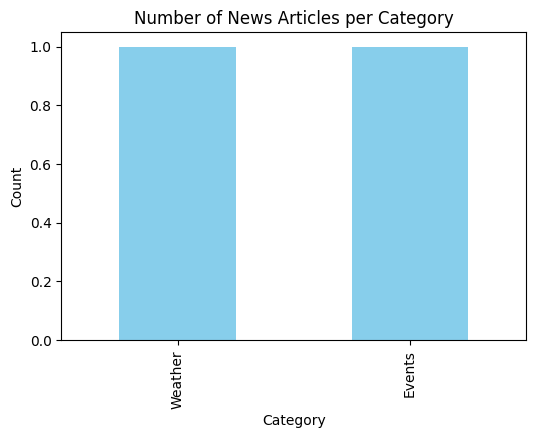

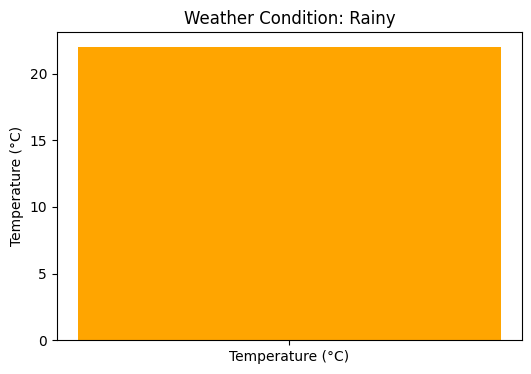

In [21]:
import matplotlib.pyplot as plt

# Count number of news articles per category
category_counts = df_news["category"].value_counts()

# Weather data (temperature and condition)
weather_temp = df_weather["temp"].iloc[0]
weather_condition = df_weather["condition"].iloc[0]

# --- Visualization 1: News Articles by Category ---
plt.figure(figsize=(6,4))
category_counts.plot(kind="bar", color="skyblue")
plt.title("Number of News Articles per Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

# --- Visualization 2: Weather vs News ---
plt.figure(figsize=(6,4))
plt.bar(["Temperature (°C)"], [weather_temp], color="orange")
plt.title(f"Weather Condition: {weather_condition}")
plt.ylabel("Temperature (°C)")
plt.show()